In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
fulldataset = pd.read_csv('2018-19_OHL_Skaters.csv')



Now, we will select which columns of the data we would like to keep for the model.

We will select Sh%, xG/G, A1/G, HD S (shooting percentage, expected goals per game, primary assists per game and high danger shots)

But, first we will remove players who played fewer than 30 games.
The original indexes will be kept so that we can find the players' names using the fulldataset dataframe.

In [5]:
df_over30gpoldindex = fulldataset.loc[fulldataset['GP'] > 30]
df_over30gp = df_over30gpoldindex.reset_index(drop = True)
df_withname = df_over30gp.loc[:, ['Name','Team','Sh%','A1/GP','xG/GP','HD Sh']]
df = df_withname.iloc[:,2:]
df_withname

,Name,Team,Sh%,A1/GP,xG/GP,HD Sh
0,Tye Felhaber,OTT,21.88,0.52,0.50,25
1,Justin Brazeau,NB,20.78,0.52,0.58,50
2,Jason Robertson,KGN/NIAG,16.67,0.70,0.65,30
3,Kevin Hancock,LDN/OS,15.53,0.57,0.43,24
4,Morgan Frost,SSM,16.92,0.78,0.53,24
5,Ben Jones,NIAG,18.18,0.66,0.46,50
6,Brandon Saigeon,HAM/OSH,15.35,0.54,0.44,18
7,Arthur Kaliyev,HAM,16.87,0.38,0.67,32
8,Anthony Salinitri,OSH/SAR,18.06,0.35,0.50,33
9,Nate Schnarr,GUE,18.24,0.60,0.38,28


We will not use the 'Elbow Method' to find the ideal number (k) of clusters. This is done by calculating the WCSS (within cluster
squared sum) for k from 1 to 10. The ideal k is the first value for which is there not a significant decrease in WCSS relative to
k+1. This is because at this k, the data is "tight" but we are not distinuishing between clusters too much.

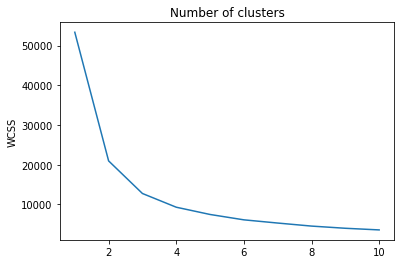

In [6]:
wcss = []    
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Based on the above graph, it is apparent that either 3 or 4 clusters should be created. Let's first try with three.

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
y_kmeans3 = kmeans.fit_predict(df)



In [143]:
y_kmeans3df = pd.DataFrame(y_kmeans3)
cluster3df = pd.concat([df_withname.iloc[:,0:2], df, y_kmeans3df], axis = 1)
cluster3df.columns = ['Name','Team','Sh%', 'A1/GP', 'xG/GP', 'HD Sh', 'Cluster']
cluster3df

# update the indexes for the df being used, and in the fulldataset with games > 30

,Name,Team,Sh%,A1/GP,xG/GP,HD Sh,Cluster
0,Tye Felhaber,OTT,21.88,0.52,0.50,25,1
1,Justin Brazeau,NB,20.78,0.52,0.58,50,1
2,Jason Robertson,KGN/NIAG,16.67,0.70,0.65,30,1
3,Kevin Hancock,LDN/OS,15.53,0.57,0.43,24,1
4,Morgan Frost,SSM,16.92,0.78,0.53,24,1
5,Ben Jones,NIAG,18.18,0.66,0.46,50,1
6,Brandon Saigeon,HAM/OSH,15.35,0.54,0.44,18,0
7,Arthur Kaliyev,HAM,16.87,0.38,0.67,32,1
8,Anthony Salinitri,OSH/SAR,18.06,0.35,0.50,33,1
9,Nate Schnarr,GUE,18.24,0.60,0.38,28,1


Now, let's try again with k = 4.

In [144]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
y_kmeans4 = kmeans.fit_predict(df)
y_kmeans4df = pd.DataFrame(y_kmeans4)
cluster4df = pd.concat([df_withname.iloc[:,0:2], df, y_kmeans4df], axis = 1)
cluster4df.columns = ['Name','Team','Sh%', 'A1/GP', 'xG/GP', 'HD Sh', 'Cluster']
cluster4df




,Name,Team,Sh%,A1/GP,xG/GP,HD Sh,Cluster
0,Tye Felhaber,OTT,21.88,0.52,0.50,25,0
1,Justin Brazeau,NB,20.78,0.52,0.58,50,2
2,Jason Robertson,KGN/NIAG,16.67,0.70,0.65,30,2
3,Kevin Hancock,LDN/OS,15.53,0.57,0.43,24,0
4,Morgan Frost,SSM,16.92,0.78,0.53,24,0
5,Ben Jones,NIAG,18.18,0.66,0.46,50,2
6,Brandon Saigeon,HAM/OSH,15.35,0.54,0.44,18,0
7,Arthur Kaliyev,HAM,16.87,0.38,0.67,32,2
8,Anthony Salinitri,OSH/SAR,18.06,0.35,0.50,33,2
9,Nate Schnarr,GUE,18.24,0.60,0.38,28,0


Now, let's make a dataframe with the cluster of the Ottawa 67s.

In [145]:
ott67s = cluster4df[cluster4df['Team']=='OTT']
ott67s

,Name,Team,Sh%,A1/GP,xG/GP,HD Sh,Cluster
0,Tye Felhaber,OTT,21.88,0.52,0.50,25,0
26,Austen Keating,OTT,14.66,0.60,0.32,24,0
33,Sasha Chmelevski,OTT,13.91,0.57,0.43,20,0
49,Marco Rossi,OTT,18.46,0.33,0.33,18,0
64,Noel Hoefenmayer,OTT,8.55,0.38,0.18,0,1
88,Kody Clark,OTT,11.48,0.33,0.26,18,0
123,Sam Bitten,OTT,18.52,0.25,0.13,11,3
139,Jack Quinn,OTT,14.63,0.16,0.12,10,3
145,Graeme Clarke,OTT,20.73,0.05,0.21,12,3
146,Mitchell Hoelscher,OTT,12.00,0.17,0.15,15,0
